### Импорты

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from datetime import datetime
from datetime import date

In [3]:
# Подключение GoogleDisk и подгрузка csv файлов для работы
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
downloaded_1 = drive.CreateFile({'id':"1A8G-lBWmugsEMuFI-r-mWKdNypkuQNpJ"})
downloaded_1.GetContentFile('course_contents.csv')
downloaded_2 = drive.CreateFile({'id':"10LS7VglKeprMi_bOPL6fSG-6PD-DoxeK"})
downloaded_2.GetContentFile('progress_phases.csv') 
downloaded_3 = drive.CreateFile({'id':"1TKD4b7rh3tKK3Qvr7vp1KjY8jsy3es3M"})
downloaded_3.GetContentFile('progresses.csv') 
downloaded_4 = drive.CreateFile({'id':"1lk51NBtF3n6g4P8xJL1mJic9AjdmazAK"})
downloaded_4.GetContentFile('students.csv') 
downloaded_5 = drive.CreateFile({'id':"1ZubGt4_pJCYKXGc2GvpssBZ0CGIrnqYR"})
downloaded_5.GetContentFile('courses.csv')

## 1. Описание и начальная работа с данными
_____________________________________________________________________


### Создание Dataframes


In [4]:
courses = pd.read_csv('courses.csv')
students = pd.read_csv('students.csv')
course_contents = pd.read_csv('course_contents.csv')
progresses = pd.read_csv('progresses.csv')
progress_phases = pd.read_csv('progress_phases.csv')

In [5]:
# объединение датафреймов progress_phases и progresses по progress_id
data = progress_phases.merge(progresses, left_on='progress_id', right_on='id')
# удаление колонки id c сохранением изменений
data.drop(columns=['id'], inplace=True)
 
# объединение общего датафрейма и датафрейма courses по course_id
data = data.merge(courses, left_on='course_id', right_on='id')
# удаление колонкок Unnamed:0, id c сохранением изменений
data.drop(columns=['Unnamed: 0', 'id'], inplace=True)
 
# объединение общего датафрейма и датафрейма course_contents по общей колонке course_id
data = data.merge(course_contents)
# удаление колонкок module_number, lesson_number c сохранением изменений
data.drop(columns=['lesson_number'], inplace=True)

### Общее количества курсов


In [6]:
# определение количества уникальных значений course_id в датасете
data['course_id'].nunique()

15

### Количества модулей на каждом курсе

In [9]:
# группировка по title и определение числа уникальных модулей на каждом курсе
data.groupby('title', as_index=False)['module_title'].nunique()

,title,module_title
0,Excel Базовый,9
1,Java-разработчик,17
2,Java-разработчик c нуля,9
3,JavaScript с нуля,18
4,PHP-разработчик с 0 до PRO. Часть 1,8
5,SMM-маркетолог от А до Я,11
6,UX-дизайн,20
7,Анимация интерфейсов,21
8,Веб-вёрстка для начинающих 2.0,8
9,Веб-дизайн PRO 2.0,17


### Количества уроков в каждом модуле на каждом курсе

In [10]:
# группировка по title и module_title и определение числа уникальных уроков в каждом модуле на каждом курсе
# все это помещаем в переменную df
df = data.groupby(['title', 'module_title'])['lesson_title'].nunique()

### Медианное количество уроков в модуле на каждом курсе

In [12]:
# в серии df из прошлого задания освобождаем от индексирования колонки title и module_title
# группируем полученный dataframe по названию курса и выводим медианного количество уроков в модулях в каждом курсе
df.reset_index()\
    .groupby('title', as_index=False)['lesson_title'].median()

,title,lesson_title
0,Excel Базовый,5.0
1,Java-разработчик,7.0
2,Java-разработчик c нуля,10.0
3,JavaScript с нуля,7.0
4,PHP-разработчик с 0 до PRO. Часть 1,4.0
5,SMM-маркетолог от А до Я,6.0
6,UX-дизайн,3.5
7,Анимация интерфейсов,3.0
8,Веб-вёрстка для начинающих 2.0,7.0
9,Веб-дизайн PRO 2.0,5.0


### Количество учеников на каждом курсе

In [13]:
# группировка по названию курса title и определение количества уникальных student_id
# сортировка в порядке убывания
count_students = pd.DataFrame(data.groupby('title')['student_id'].nunique())
count_students.columns = ['count_students']
count_students

,count_students
title,
Excel Базовый,782
Java-разработчик,763
Java-разработчик c нуля,581
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
SMM-маркетолог от А до Я,506
UX-дизайн,1151
Анимация интерфейсов,598
Веб-вёрстка для начинающих 2.0,2004


### Минимальный, максимальный, средний, медианный возраст студентов


In [ ]:
# создание копии датафрейма students для работы
students_clear = students.copy()
 
# очистка всех значений, которые не имеют даты рождения
students_clear.drop(students_clear[students_clear['birthday'].isna()].index, inplace=True)
 
# преобразование колонки birthday из формата str в формат datetime.date
students_clear['birthday'] = students_clear['birthday'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d').date())
 
# добавление колонки возраста (age) в датасете students_clear
today = datetime.now().date()
students_clear['age'] = students_clear['birthday'].apply(lambda birthday: today.year - birthday.year - ((today.month, today.day) < ( birthday.month,  birthday.day)))
 
# запрос максимального, минимального, среднего и медианного возраста студентов
students_clear['age'].agg(['max', 'min', 'mean', 'median'])

max       2019.000000
min      -7167.000000
mean        29.110553
median      29.000000
Name: age, dtype: float64

In [ ]:
# удаляем из dataframe студентов, у которых была указана некорректная дата рождения
students_clear = students_clear.drop(students_clear[(students_clear['age'] > 80) | (students_clear['age'] <= 7)].index)

In [ ]:
# запрос максимального, минимального, среднего и медианного возраста студентов
students_clear['age'].agg(['max', 'min', 'mean', 'median'])

max       80.000000
min        9.000000
mean      29.619841
median    29.000000
Name: age, dtype: float64

### Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе


In [ ]:
# объединение "очищенного" датафрейма студентов из прошлого задание с датафреймом progress, для получения course_id
students_clear = students_clear.merge(progresses, left_on='id', right_on='student_id').drop(columns=['id_y', 'student_id'])

In [ ]:
# объединение "очищенного" датафрейма студентов из прошлого задание с датафреймом progress, для получения course_id
students_clear = students_clear.merge(courses, left_on='course_id', right_on='id').drop(columns=(['Unnamed: 0', 'id', 'field']))

In [ ]:
# группировка по названию курса и запрос максимального, минимального, среднего и медианного возраста студентов
students_clear.groupby('title')['age'].agg(['max', 'min', 'mean', 'median'])

,max,min,mean,median
title,,,,
Excel Базовый,61,17,34.207207,34
Java-разработчик,65,15,29.898108,29
Java-разработчик c нуля,55,14,30.094828,29
JavaScript с нуля,59,14,29.175055,28
PHP-разработчик с 0 до PRO. Часть 1,75,14,30.081988,29
SMM-маркетолог от А до Я,52,17,29.593561,29
UX-дизайн,58,15,30.717871,30
Анимация интерфейсов,51,15,30.184358,30
Веб-вёрстка для начинающих 2.0,59,14,29.191404,28


### Bar-chart, отражающий количество студентов на каждом курсе

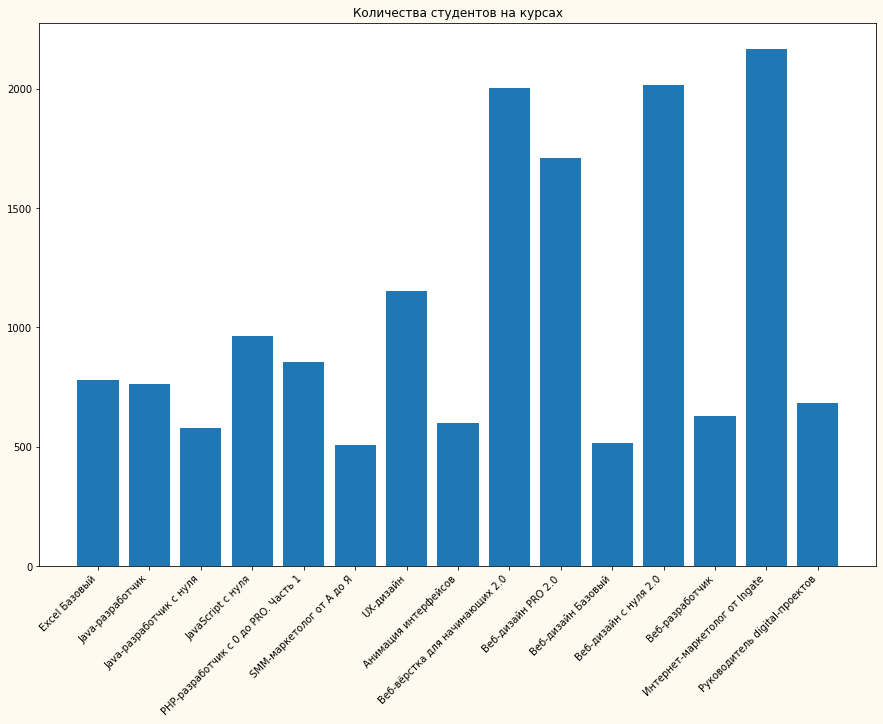

In [ ]:
# создание "тела" графика с размером 15 на 10 и осей
fig, ax = plt.subplots(figsize=(15, 10))

# изменение фона графика
fig.set_facecolor('floralwhite')

# построение bar-ов: по оси х отложены курсы, по оси y отложено количество студентов на каждом курсе
ax.bar(count_students.index, count_students.count_students)
# задаем название графика
ax.set_title('Количества студентов на курсах')

# редактируем обозначение по оси Х - размер шрифта 10, поворот на 45 градусов, расположение надписей по правому краю
ax.set_xticklabels(count_students.index, fontsize=10, rotation=45, horizontalalignment='right')

# выводим график на экран
plt.show()

### Горизонтальный bar-chart, отражающий количество студентов на каждом курсе

In [ ]:
# объединение датафреймов count_students и courses по title
# удаление колонок 'Unnamed: 0' и 'id'
count_students = count_students.merge(courses, left_on='title', right_on='title').drop(columns=['Unnamed: 0', 'id'])

In [ ]:
# сортировка по количеству студентов в порядке убывания с изменением исходного датафрейма
count_students.sort_values('count_students', ascending=True, inplace=True)
 
# среднее количество студентов
count_students.count_students.median()

782.0

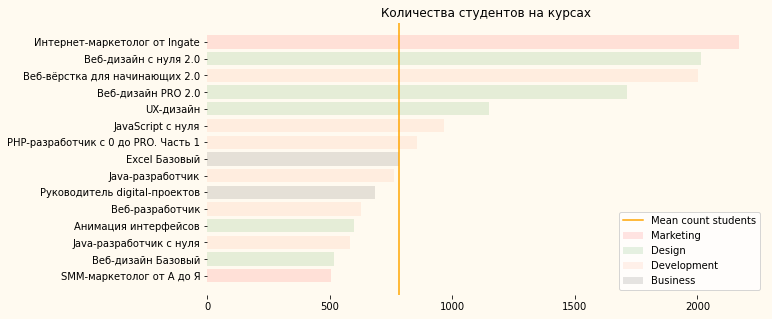

In [ ]:
# создание "тела" графика с размером 10 на 5 и осей
fig, ax = plt.subplots(figsize=(10, 5))
# изменение фона графика
fig.set_facecolor('floralwhite')

# создание списка "лейблов" из уникальных значений колонки field в датафрейме count_students
labels = count_students.field.unique()
# создание пустого списка, для учета использованных "лейблов"
used_labels = []

# блок добавление лейблов к столбцам и цвета, в зависимости от лейбла
# если лейбл уже использовался, то в начала параметр label приписывается "_", тем самым подсказываю matplotlib, чтобы он не дублировался лейбл в легенде
# если лейбл не использовался, то добавляем его в список использованных лейблов, а в параметр label пишется оригинальное название
# в параметре alpha указываем прозрачность 0.1
for index, row in count_students.iterrows():
  if row.field == labels[0]:
    if row.field in used_labels:
      ax.barh(row.title, row.count_students, label=f'_{row.field}', color='red', alpha=0.1)
    else:
      ax.barh(row.title, row.count_students, label=row.field, color='red', alpha=0.1)
      used_labels.append(row.field)
  elif row.field == labels[1]:
    if row.field in used_labels:
      ax.barh(row.title, row.count_students, label=f'_{row.field}', color='green', alpha=0.1)
    else:
      ax.barh(row.title, row.count_students, label=row.field, color='green', alpha=0.1)
      used_labels.append(row.field)
  elif row.field == labels[2]:
    if row.field in used_labels:
      ax.barh(row.title, row.count_students, label=f'_{row.field}', color='coral', alpha=0.1)
    else:
      ax.barh(row.title, row.count_students, label=row.field, color='coral', alpha=0.1)
      used_labels.append(row.field)
  elif row.field == labels[3]:
    if row.field in used_labels:
      ax.barh(row.title, row.count_students, label=f'_{row.field}', color='black', alpha=0.1)
    else:
      ax.barh(row.title, row.count_students, label=row.field, color='black', alpha=0.1)
      used_labels.append(row.field)
 
# задаем название графика
ax.set_title('Количества студентов на курсах')
# задаем линию, показывающее медианное значение количества студентов
ax.axvline(x=count_students.count_students.median(), ls='-', label='Mean count students', color='orange')
# убираем рамку графика
ax.set_frame_on(False)
# отображаем легенду
ax.legend()

# отображаем график на экране
plt.show()

### На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

1. Среднее количество уроков на каждом в модулях на каждом курсе приблизительно одинаковое
2. Средний возраст студентов, проходящих курсы - 29 лет. Минимальный возраст - 9 лет, максимальный возраст - 80 лет
3. Средний возраст студентов по каждым курсам такой же - 28-29 лет. Самые "возрастные" студенты на курсах по Excel и руководителей digital проектов (32 года)
4. Преобладающее количество студентов проходят курсы, связаные с web составляющими - верстка, дизайн
5. Самый продимый курс - интернет-маркетолог

## 2. Расчет потенциальной нагрузки на преподавателей


### Рассчет прироста студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно)

In [ ]:
# создаем dataframe из значений, в которых в уроке присутствует домашняя работа
df = data[data['is_homework'] == True]

# приведем дату начала выполнения домашней работы к формату "год-месяц"
df['start_date'] = df['start_date'].apply(lambda date: datetime.strptime(date.split(' ')[0], '%Y-%m-%d').strftime('%Y-%m'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# создаем dataframe, который отображает количество студентов, которые начали выполнять свою первую работу в определенную дату
# сперва мы группируем данные по названию курса и id студента, выбираем самую первую дату начала выполнения работы (считаем, что это его первая домашняя работа)
# и сбрасываем сгруппированный индекс по навазниию курса и id
# потом мы группируем данные по названию курса и дате выполнения первой домашней работы и определеяем количество студентов, которые начали выполнять свою первую работу в эту дату
# после сбрасываем индекс 
count_students = pd.DataFrame(df.groupby(['title', 'student_id'])['start_date'].min()).reset_index() \
                                    .groupby(['title', 'start_date'])['student_id'].count().reset_index()

In [ ]:
# создание списка дат, который начинается с первого месяца начала выполнения домашней работы и заканчивается последним месяцем начала выполнения домашней работы
# и приводим к формату строки
datelist = pd.period_range(start=df['start_date'].min(), end=df['start_date'].max(), freq='M').astype('str')
# создание списка уникальных названий курсов
title_courses_list = df['title'].unique()
 
# создание результирующего dataframe, в который мы будем помещать данные по притоку студентов в каждом месяце
df_res_1 = pd.DataFrame(columns=datelist, index=title_courses_list)
# все пропущенные значения (в нашем случае все) заменяем на 0
df_res_1 = df_res_1.fillna(0)

In [ ]:
# заполняем dataframe с приростом студентов:
# 1 - в цикле проходим названиям курсов
# 2 - во вложеном цикле проходим по датам, которые присутствуют в конкретном курсе (так мы избегаем ошибки обращения к дате, которой нет в курсе)
# 3 - вставляем в ячейку в dataframe df_res значения количество студентов, которое мы берем из dataframe count_students по названию курса и дате
for course in title_courses_list:
  for date in count_students[count_students['title'] == course]['start_date']:
    df_res_1.loc[course, date] = count_students[(count_students['start_date'] == date) & (count_students['title'] == course)]['student_id'].values

In [ ]:
df_res_1

,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
Веб-дизайн PRO 2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,65,42,43,27,28,43,59,57,69,56,60,47,40
Интернет-маркетолог от Ingate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,76,94,84,90,79,109,106,103,96,72,106,146,124,125,115,140,114,91
UX-дизайн,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,1,0,0,0,0,0,0,0,61,61,41,53,25,42,46,60,36,43,47,68,34,39,20,26,48,18
JavaScript с нуля,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,13,15,17,18,23,42,36,37,57,42,57,49,51,34,21
Веб-дизайн с нуля 2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,105,100,126,125,106,150,231,127,141,118,100,89,76
Веб-разработчик,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,30,47,47,40,54,40,13,12,9,15,7,7,7,9,0,9,3,4
Анимация интерфейсов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,15,14,14,29,29,27,30,27,14,22,34,17,14,11,10,14,7
Веб-вёрстка для начинающих 2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94,97,117,78,81,132,119,83,106,91,82,89,72
Руководитель digital-проектов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,66,42,32,27,36,30,30,35,27,30,38,63,29,36,17,25,15,20
PHP-разработчик с 0 до PRO. Часть 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,7,12,19,18,28,31,27,35,35,23,38,32,31,29,15


### Line-graph с приростом студентов в каждом месяце для каждого курса

In [ ]:
# создаем набор графиков, состоящий из 1 столбца и 15 строк
fig, axes = plt.subplots(8, 2, figsize=(30, 80))
row, column = 0, 0


# через цикл по названиям курсов заполняем графики 
for index, course in enumerate(title_courses_list):
    # создаем график по конкретном курсы; по оси Х - даты, по оси Y - количество прироста студентов в определенную дату
    axes[row, column].plot(df_res_1.loc[course].index, df_res_1.loc[course].values)
    # задаем поворот оси Х на 45 градусов
    axes[row, column].set_xticklabels(df_res_1.loc[course].index, rotation=45)
    # устанавливаем название графика и размер шрифта
    axes[row, column].set_title(course, fontsize=16)
    # устанавливаем название оси Y и размер шрифта
    axes[row, column].set_ylabel('Количество студентов', fontsize=16)
    
    column += 1
    if column == 2:
        row += 1
        column = 0
    
    
# отрисовываем все графики
plt.show()

### Line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса

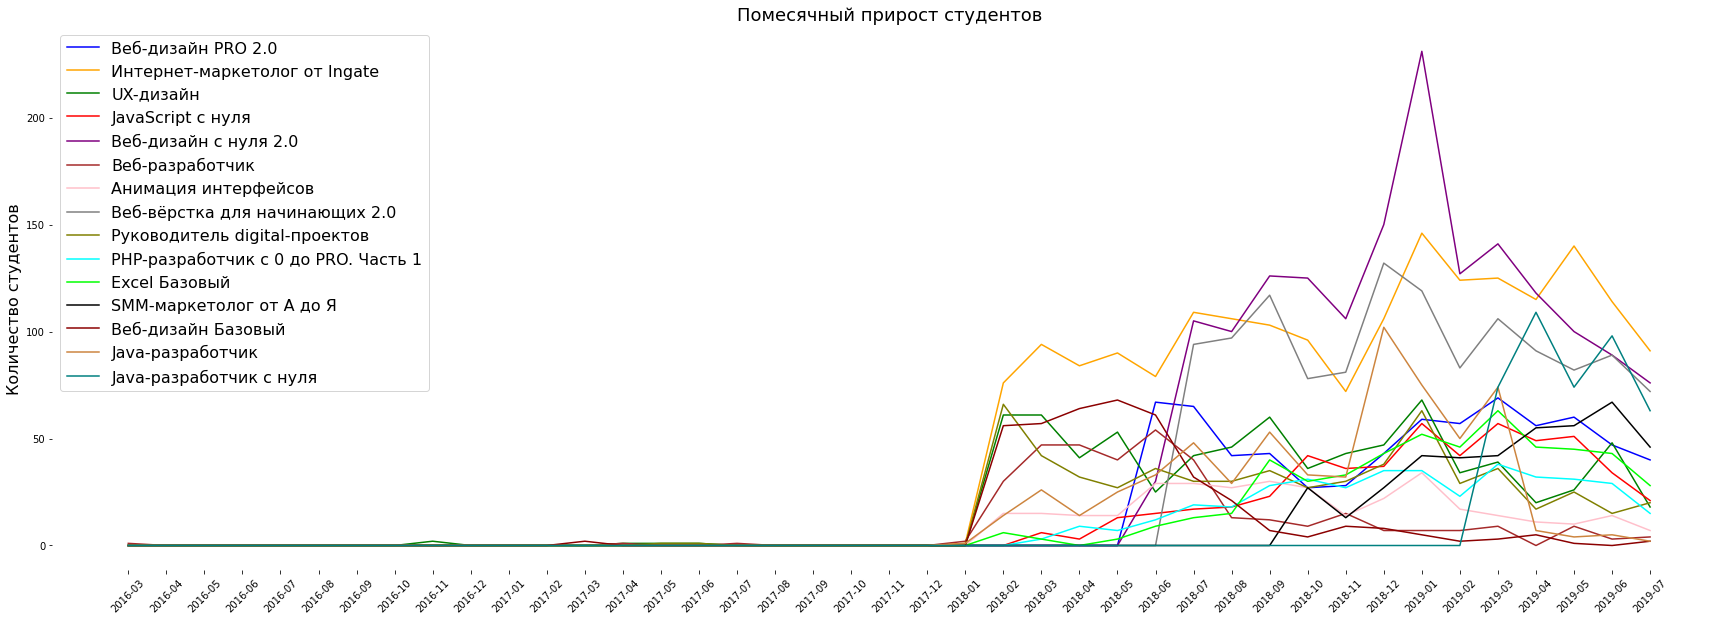

In [ ]:
# создаем список с 15 разными цветами (по количеству курсов в данных)
color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'black', 'darkred', 'peru', 'teal']

# создаем фигуру
fig, ax = plt.subplots(figsize=(30, 10))

# в цикле проходим по названиям курсов и помещаем все графики на один
# с помощью функции enumerate мы проходим по списку цветов
for color_index, course in enumerate(title_courses_list):
    ax.plot(df_res_1.loc[course].index, df_res_1.loc[course].values, label=course, color=color_list[color_index])

# создаем легенду и задаем размер шрифта
ax.legend(fontsize=16)
# задаем поворот оси Х на 45 градусов
ax.set_xticklabels(df_res_1.loc[course].index, rotation=45)
# задаем название и размер шрифта оси Y
ax.set_ylabel('Количество студентов', fontsize=16)
# задаем название и рамер шрифта общего графика
ax.set_title('Помесячный прирост студентов', fontsize=18)
# отключаем границу графика
ax.set_frame_on(False)

# отрисоываем график
plt.show()

### Рассчeт количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса

In [ ]:
# создаем dataframe, в котором будут только выполнившие домашнее задание студенты
df_1 = df[df['status'] == 'done']
# приведем дату окончания выполнения домашней работы к формату "год-месяц" 
df_1['finish_date'] = df_1['finish_date'].apply(lambda date: datetime.strptime(date.split(' ')[0], '%Y-%m-%d').strftime('%Y-%m'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# создадим dataframe, в котором месяц окончания выполнения домашней работы совпадает с месяцом начала выполнения
# удалим ненужные в исследование колонки
same_dates = df_1[df_1['start_date'] == df_1['finish_date']]\
    .drop(columns=['status', 'progress_id', 'course_id', 'field', 'module_title', 'lesson_title', 'lesson_token', 'is_video', 'is_homework'])

# создадим dataframe, в котором месяц окончания выполнения домашней работы отличается от месяца начала выполнения
# удалим ненужные в исследование колонки
different_dates = df_1[df_1['start_date'] != df_1['finish_date']]\
    .drop(columns=['status', 'progress_id', 'course_id', 'field', 'module_title', 'lesson_title', 'lesson_token', 'is_video', 'is_homework'])

In [ ]:
# в dataframe с разными датами начала и окончания выполнения домашней работы добавляем колонку со списком дат, в течение которых выполнялась домашняя работа
different_dates['dates'] = different_dates.apply(lambda df: pd.period_range(df['start_date'], df['finish_date'], freq='M').tolist(), axis=1)

In [ ]:
# создаем пустой список, в который мы будем помещать строки для измененного dataframe с разными датами начала и конца выполнения домашней рабты
rows = []

# создаем игнорируемую переменную в которой мы создаем строки, содержащие название курса, id студента и отдельных дат, взятых их списков в колонке dates
# помещем эти строки в список rows
_ = different_dates.apply(lambda row: [rows.append([row['title'], row['student_id'], date])for date in row.dates], axis=1)

# заменяем dataframe, который содержал студентов, у которых начало и окончание выполнения домашней работы было в разные даты на новый
# в котором списки с периодом выполнения домашней работы "раскрыты"
different_dates = pd.DataFrame(rows, columns=['title', 'student_id', 'date'])\

In [ ]:
# заменяем dataframe с различными датами начала и окончания выполнения домашней работы на новый, который получается путем группирования предыдущей версии
# по названию курса и дате и нахождения количества студентов, которые выполняли домашнюю работу в эти даты, на конкретном курсе
# после мы освобождаем от индексирования колонки title и date
different_dates = different_dates.groupby(['title', 'date'])['student_id'].count()\
                                .reset_index()

In [ ]:
different_dates['date'] = different_dates['date'].astype(str)

In [ ]:
# заменяем dataframe с одинаковыми датами начала и окончания выполнения домашней работы на новый, который получается путем группирования предыдущей версии
# по названию курса и дате и нахождения количества студентов, которые закончили выполнять домашнюю работу в эту даты, на конкретном курсе
# после мы освобождаем от индексирования колонки title и finish_date
same_dates = same_dates.groupby(['title', 'finish_date'])['student_id'].count()\
                    .reset_index()

In [ ]:
# создание списка дат, который начинается с первого месяца начала выполнения домашней работы и заканчивается последним месяцем начала выполнения домашней работы
# и приводим к формату строки
datelist = pd.period_range(start=df['start_date'].min(), end=df['start_date'].max(), freq='M').astype('str')
# создание списка уникальных названий курсов
title_courses_list = df['title'].unique()
 
# создание результирующего dataframe, в который мы будем помещать данные по притоку студентов в каждом месяце
df_res_2 = pd.DataFrame(columns=datelist, index=title_courses_list)
# все пропущенные значения (в нашем случае все) заменяем на 0
df_res_2 = df_res_2.fillna(0)

In [ ]:
# заполняем dataframe с приростом студентов:
# 1 - в цикле проходим названиям курсов
# 2.1 - в первом вложеном цикле проходим по датам dataframe с одинаковыми датами начала и окончания выполнения домашней работы, 
# которые присутствуют в конкретном курсе (так мы избегаем ошибки обращения к дате, которой нет в курсе)
    # 2.2 - вставляем в ячейку в dataframe df_res значения количество студентов, которое мы берем из dataframe same_dates по названию курса и дате
# 3.1 - во втором вложеном цикле проходим по датам dataframe с разными датами начала и окончания выполнения домашней работы, 
# которые присутствуют в конкретном курсе (так мы избегаем ошибки обращения к дате, которой нет в курсе)
    # 3.2 - добавляем к уже имеющимся данным в ячейке в dataframe df_res значения количество студентов, которое мы берем из dataframe different_dates по названию курса и дате
for course in title_courses_list:
    for date in same_dates[same_dates['title'] == course]['finish_date']:
        df_res_2.loc[course, date] = same_dates[(same_dates['finish_date'] == date) & (same_dates['title'] == course)]['student_id'].values
    
    for date in different_dates[different_dates['title'] == course]['date']:
        df_res_2.loc[course, date] += different_dates[(different_dates['date'] == date) & (different_dates['title'] == course)]['student_id'].values

In [ ]:
df_res_2

,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
Веб-дизайн PRO 2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,155,174,226,280,277,290,335,380,487,448,477,452,173
Интернет-маркетолог от Ingate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,178,244,295,306,342,473,494,529,592,678,691,820,770,751,684,609,618,296
UX-дизайн,0,0,0,0,0,0,0,0,4,2,1,2,1,2,3,6,1,0,0,0,0,0,0,159,196,220,215,213,235,249,318,303,298,297,351,328,303,228,195,200,86
JavaScript с нуля,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,21,30,48,92,100,102,158,175,201,318,315,327,315,308,296,101
Веб-дизайн с нуля 2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,240,430,675,938,1140,1371,2130,1975,1919,1716,1394,1241,458
Веб-разработчик,5,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,0,0,0,0,0,2,153,225,349,319,389,374,227,142,138,144,96,96,104,74,57,51,41,16
Анимация интерфейсов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,44,58,58,95,122,131,135,168,159,127,185,158,141,92,80,72,24
Веб-вёрстка для начинающих 2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,269,393,396,431,507,569,502,532,473,408,348,141
Руководитель digital-проектов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,233,201,211,212,263,254,253,274,301,268,270,347,348,348,264,256,172,103
PHP-разработчик с 0 до PRO. Часть 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,22,34,48,84,72,95,120,97,135,142,97,122,144,130,82,29


NameError: ignored

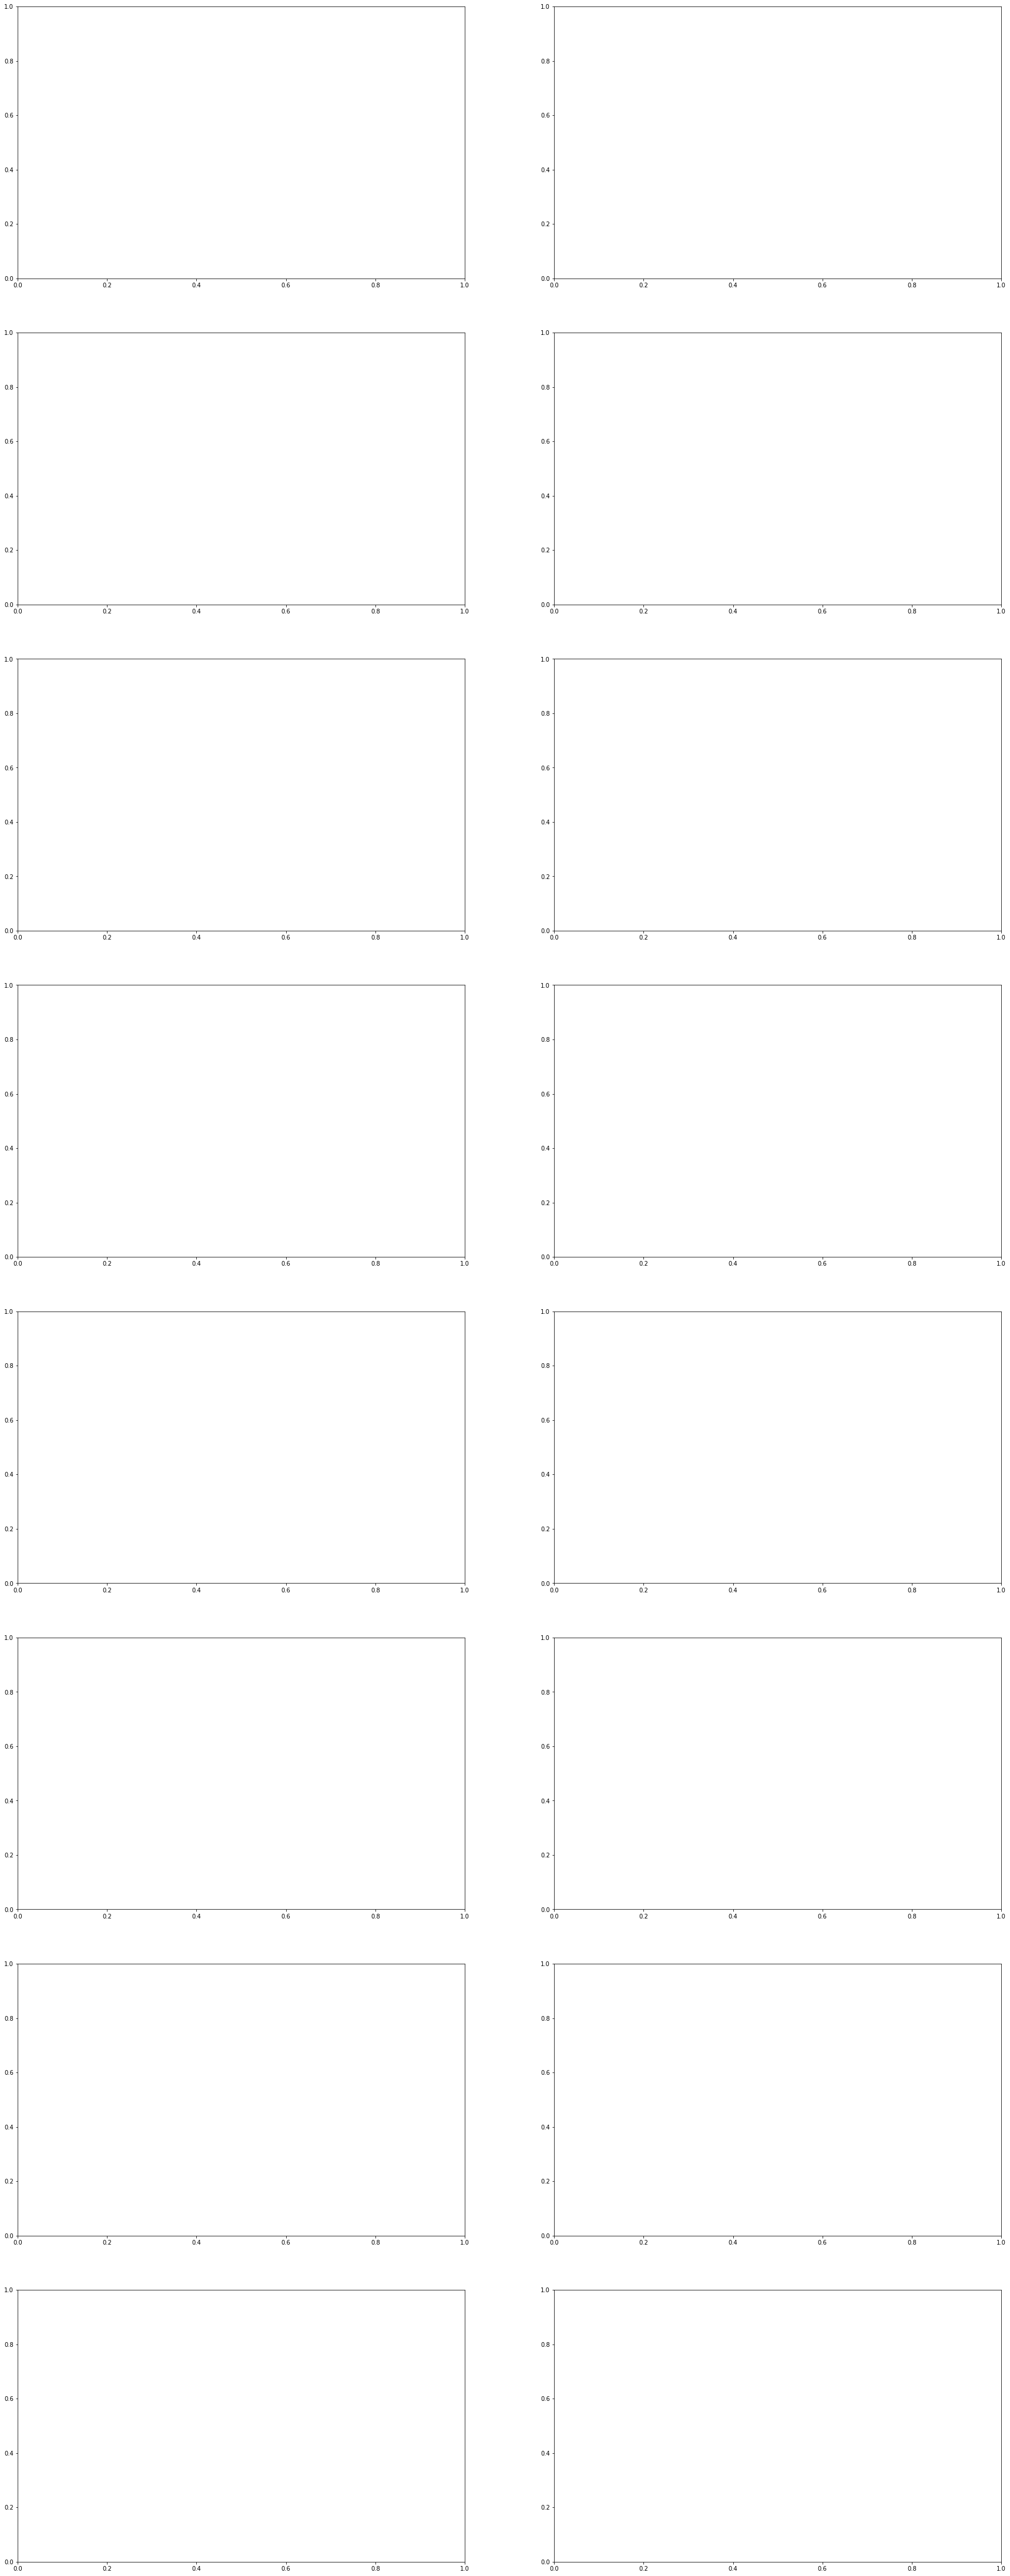

In [14]:
# создаем набор графиков, состоящий из 1 столбца и 15 строк
fig, axes = plt.subplots(8, 2, figsize=(30, 80))
row, column = 0, 0


# через цикл по названиям курсов заполняем графики 
for index, course in enumerate(title_courses_list):
     # создаем график по конкретном курсы; по оси Х - даты, по оси Y - количество прироста студентов в определенную дату
     axes[row, column].plot(df_res_2.loc[course].index, df_res_2.loc[course].values)
     # задаем поворот оси Х на 45 градусов
     axes[row, column].set_xticklabels(df_res_2.loc[course].index, rotation=45)
     # устанавливаем название графика и размер шрифта
     axes[row, column].set_title(course, fontsize=16)
     # устанавливаем название оси Y и размер шрифта
     axes[row, column].set_ylabel('Прогресс выполнения домашних работ', fontsize=16)
    
     column += 1
     if column == 2:
         row += 1
         column = 0
    
    
# отрисовываем все графики
plt.show()

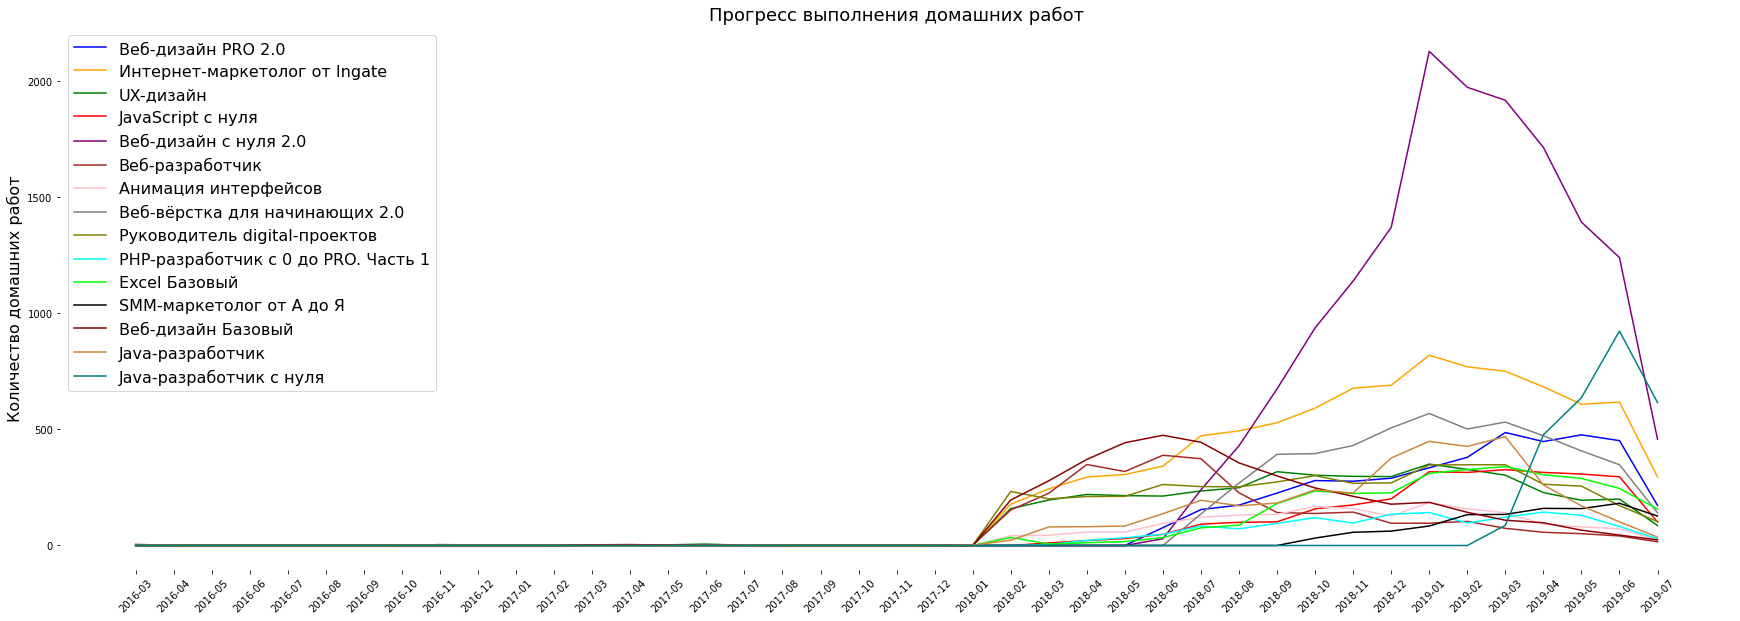

In [ ]:
# создаем список с 15 разными цветами (по количеству курсов в данных)
color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'black', 'darkred', 'peru', 'teal']

# создаем фигуру
fig, ax = plt.subplots(figsize=(30, 10))

# в цикле проходим по названиям курсов и помещаем все графики на один
# с помощью функции enumerate мы проходим по списку цветов
for color_index, course in enumerate(title_courses_list):
    ax.plot(df_res_2.loc[course].index, df_res_2.loc[course].values, label=course, color=color_list[color_index])

# создаем легенду и задаем размер шрифта
ax.legend(fontsize=16)
# задаем поворот оси Х на 45 градусов
ax.set_xticklabels(df_res_2.loc[course].index, rotation=45)
# задаем название и размер шрифта оси Y
ax.set_ylabel('Количество домашних работ', fontsize=16)
# задаем название и рамер шрифта общего графика
ax.set_title('Прогресс выполнения домашних работ', fontsize=18)
# отключаем границу графика
ax.set_frame_on(False)

# отрисоываем график
plt.show()

- На большинстве курсов мы видем, что большой приток студентов начался в начале 2018 или апреле 2018 (исключение - курс "Java-разработчик с нуля". Скорее всего курс был запущен в феврале 2019). Можно сделать предположение, что с марта 2016 до начала 2018 года платформа только "набирала обороты", либо велась неэффективная маркетинговая программа.
- Сперва популярностью пользовался курс "Интернет-маркетолог от Ingate". Летом 2018 к нему по количеству новых студентов добавились курсы "Веб-дизайн с нуля 2.0" и "Веб-верстка для начинающих 2.0". Новые версии этих курсов стали пользоваться большей популярностью. В конце 2018 - начало 2019 мы наблюдаем большой приток студентов на курс "Веб-дизайн с нуля 2.0". Большой популярностью пользуется курс "Java-разработчик с нуля" - сразу же после его выхода наблюдается резкий прирост студентов. Остальные курсы держатся относительно на ровне по притоку студентов.
- По количеству выполненных домашних работ уверенное лидерство занимает курс "Веб-дизайн с нуля 2.0", что объяснется большим количеством студентов, проходящим данный курс. Следом все также идут курсы "Интернет-маркетолог от Ingate", "Java-разработчик с нуля". Все остальные курсы все также идут на ровне и по количеству выполненных домашних работ.

## 3. Выявление проблемных модулей

### Рассчет минимального, максимального, среднего, медианного времи прохождения каждого модуля

In [ ]:
# создаем dataframe из значений, в которых в уроке присутствует домашняя работа и она выполнена
# убираем столбцы, которые не понадобятся в исследовании
df = data[(data['is_homework'] == True) & (data['status'] == 'done')]\
      .drop(columns=['progress_id', 'status', 'course_id', 'field', 'lesson_title', 'is_video', 'is_homework'])

In [ ]:
# # приведем дату начала выполнения домашней работы к формату "год-месяц-день" 
df['start_date'] = df['start_date'].apply(lambda date: datetime.strptime(date.split(' ')[0], '%Y-%m-%d'))

# # приведем дату окончания выполнения домашней работы к формату "год-месяц-день" 
df['finish_date'] = df['finish_date'].apply(lambda date: datetime.strptime(date.split(' ')[0], '%Y-%m-%d'))

In [ ]:
# в новых dataframe помещаем результат группрровки данных по названию курса, названию модуля и id студента
# путем вычитания даты сдачи начала выполнения первой домашней работы модуля и даты окончания выполнения последней домашней работы модуля
# получаем время, затраченное на выполнение модуля
df_1 = df.groupby(['title', 'module_title', 'student_id'])\
            .apply(lambda df: df['finish_date'].max() - df['start_date'].min())\
            .reset_index()

# изменяем название колонок
df_1.columns=['course_title', 'module_title', 'student_id', 'days_per_module']
 
# из полученных значение разницы времени получаем значение этой разницы в днях
df_1['days_per_module'] = df_1['days_per_module'].dt.days
 
# создание списка уникальных названий курсов
title_courses_list = df_1['course_title'].unique()

In [ ]:
# в результирующий dataframe помещаем результат группировки данных по названию курса и названию модуля
# находим максимальное, минимальное, среднее и медианное значение времени (в днях), затраченого на выполнение модулях
df_res_1 = df_1.groupby(['course_title', 'module_title'])['days_per_module'].agg(['max', 'min', 'mean', 'median'])

In [ ]:
df_res_1

max  ...  median
course_title                  module_title                                             ...        
Excel Базовый                  Визуализация данных Excel                          175  ...     5.0
                              Основной функционал Excel                           184  ...     2.0
                              Основной функционал Excel (продолжение)             185  ...     2.0
                              Сводные таблицы Excel                               239  ...     3.0
                              Формулы и функции Excel. Более сложные формулы      176  ...     3.0
...                                                                               ...  ...     ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   212  ...     7.0
                              Требовательность digital-продюсера                  397  ...     8.0
                              Управление временем                                 164  ...     4.0
                              Управление дизайнерами. Разработка дизайна по s...  199  ...     8.0
                              Экологичный путь менеджера                          246  ...     3.0

[190 rows x 4 columns]

### Line-graph с медианным временем прохождения каждого модуля для каждого курса

In [ ]:
# создаем набор графиков, состоящий из 1 столбца и 15 строк
fig, axes = plt.subplots(8, 2, figsize=(30, 90))
row, column = 0, 0


# через цикл по названиям курсов заполняем графики 
for course in title_courses_list:
    # создаем список с названием модулей в каждом конкретном курсе
    module_list = df_res.loc[course].index
    
    # создаем график по конкретном курсы; по оси Х - даты, по оси Y - количество прироста студентов в определенную дату
    axes[row, column].plot(df_res.loc[course]['median'])
    # устанавливаем название графика и размер шрифта
    axes[row, column].set_title(course, fontsize=16)
    # устанавливаем название оси Y и размер шрифта
    axes[row, column].set_ylabel('Медианное время выполнения модулей', fontsize=16)
    # задаем угол для оси Х 45 градосов и расположение надписей по правосу краю
    axes[row, column].set_xticklabels(df_res.loc[course].index, rotation=45, horizontalalignment='right')
    plt.subplots_adjust(hspace=2)
    
    column += 1
    if column == 2:
        row += 1
        column = 0
    
    
# отрисовываем все графики
plt.show()

### Расчет медианного времи выполнения домашней работы по месяцам для каждого курса для выявления сезонности.


In [ ]:
#делаем копию dataframe, полученного из прошлого пункта
df_2 = df.copy()

In [ ]:
# добавляем в dataframe новую колонки, в которой будет список дат (дней), в течение которых выполнялась каждая домашняя работа
df_2['days_period'] = df_2.apply(lambda row: pd.period_range(start=row['start_date'], end=row['finish_date'], freq='D'), axis=1)

In [ ]:
# в исследовании мы будем использовать только следующие колонки
df_2 = df_2[['title', 'student_id', 'lesson_token', 'days_period']]

In [ ]:
def find_unique_month(dates):
  """
  Функция возращает список уникальных месяцев, которые присутствуют в списке дат
  На вход принимается список дат
  """
  months = []
  for date in dates:
    month = date.month
    if month in months:
      continue
    else:
      months.append(month)
    
  return months

In [ ]:
# добавляем в dataframe новую колонку, в которой будет список месяцев, в течении которых выполнялась домашняя рабоа
df_2['months'] = df_2['days_period'].apply(find_unique_month)

In [ ]:
# создаем пустой список, в который мы будем помещать строки для измененного dataframe с разными датами начала и конца выполнения домашней рабты
rows = []
 
# создаем игнорируемую переменную в которой мы создаем строки, 
# содержащие название курса, id студента, токен урока, период выполнения и отдельных месяцев, взятых их списков в колонке months
# помещем эти строки в список rows
_ = df_2.apply(
    lambda row: [rows.append([row['title'], row['student_id'], row['lesson_token'], row['days_period'], month]) for month in row.months], 
    axis=1)
 
# заменяем dataframe на новый
df_2 = pd.DataFrame(rows, columns=['title', 'student_id','lesson_token', 'days_period', 'month'])

In [ ]:
def find_count_days_per_homework(data):
  """
  Функция возвращает количество дней, затраченных на выполнение домашней работы
  в определенном месяце.
  На вход принимается dataframe
  """
  count_days = 0
  month = data['month']
  period = data['days_period']
 
  for date in period:
    if date.month == month:
      count_days += 1
 
  return count_days

In [ ]:
# добавляем в dataframe новую колонку, в которой будет количество дней, потраченных на выполнение домашней работы
df_2['days_per_homework'] = df_2.apply(find_count_days_per_homework, axis=1)

In [ ]:
# в результирующий dataframe помещаем результат группировки данных по названию курса и номеру месяца
# медианное значение времени (в днях), затраченого на выполнение модулях в каждом месяце
df_res = df_2.groupby(['title', 'month'])['days_per_homework'].agg(['median'])

In [ ]:
df_res

median
title                         month        
Excel Базовый                 1         3.0
                              2         3.0
                              3         4.0
                              4         3.0
                              5         4.0
...                                     ...
Руководитель digital-проектов 8        13.0
                              9        12.0
                              10        7.0
                              11        9.0
                              12       11.0

[171 rows x 1 columns]

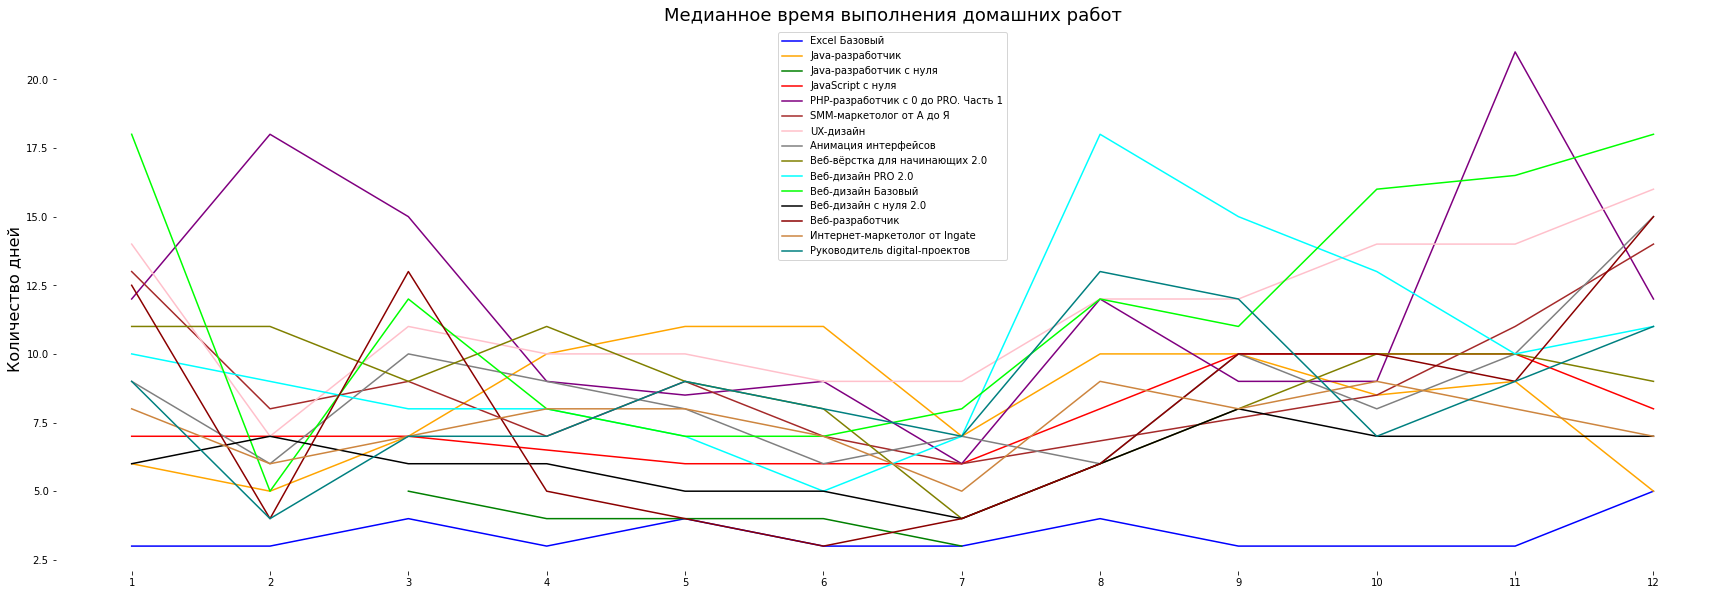

In [ ]:
# создаем список с 15 разными цветами (по количеству курсов в данных)
color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'black', 'darkred', 'peru', 'teal']

# создаем фигуру
fig, ax = plt.subplots(figsize=(30, 10))

# в цикле проходим по названиям курсов и помещаем все графики на один
# с помощью функции enumerate мы проходим по списку цветов
for color_index, course in enumerate(title_courses_list):
    ax.plot(df_res.loc[course]['median'], label=course, color=color_list[color_index])

# создаем легенду и задаем размер шрифта
ax.legend(fontsize=10)
# задаем поворот оси Х на 45 градусов
ax.set_xticklabels(df_res.loc[course].index)
# задаем название и размер шрифта оси Y
ax.set_ylabel('Количество дней', fontsize=16)
# задаем название и рамер шрифта общего графика
ax.set_title('Медианное время выполнения домашних работ', fontsize=18)
# отключаем границу графика
ax.set_frame_on(False)
# задаем начало и конец оси Х и шаг
ax.set_xticks(np.arange(1, 13, 1))

# отрисоываем график
plt.show()

1. Самое большое время выполнение у последних работ на курсе - димлом, экзамен, курсовая.
2. Самым "долгим" по времени выполнения курсом является "PHP-разработчик с 0 до PRO". Такое время может быть либо из-за больших или сложных домашних работ, либо из-за долгих проверок домашних работ преподавателями.
3. Курс "Excel Базовый" является самым "быстрым" курсом. Скорее всего это прозошло из-за легкости домашних работ, ведь курс базовый.
4. По всем курсам видно, что дольше всего работы делаются (или проверяются) в декабре-январе, что скорее всего обусловлено праздничными хлопотами и подготвкой годовых отчетов на работе. 
5. Также видно увеличение время выполнение работы с приходом лета. Это скорее всего происходит из-за отпусков как учеников, так и преподавателей. Первые дольше делают работы из-за невозможности выделить время на обучение. Преподаватели ходят в отпуск по очереди и домашние работы одних перекладываются на других.

## 4. Расчет конверсии


### Расчет конверсии перехода студентов из одного модуля в другой на каждом курсе


In [ ]:
df = data[data['is_homework'] == True][['status', 'start_date', 'finish_date', 'student_id', 'title', 'module_number', 'module_title', 'lesson_title', 'lesson_token', 'field']]

In [ ]:
# количество студентов, закончивших модуль
df_1 = df[df['status'] == 'done']\
        .groupby(['title', 'module_number', 'module_title', 'student_id'])['finish_date'].max()\
        .reset_index()\
        .groupby(['title', 'module_number', 'module_title'])['student_id'].count()\
        .reset_index()

df_1.columns = ['title', 'module_number', 'module_title', 'count_end_students']

In [ ]:
df_1

,title,module_number,module_title,count_end_students
0,Excel Базовый,1,Основной функционал Excel,458
1,Excel Базовый,2,Основной функционал Excel (продолжение),406
2,Excel Базовый,3,Формулы и функции Excel. Введение,387
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,303
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,270
...,...,...,...,...
185,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,88
186,Руководитель digital-проектов,13,Интеграционные проекты.,69
187,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,64
188,Руководитель digital-проектов,15,Основы технической грамотности,64


In [ ]:
# количество студентов, начавших модуль
df_2 = df.groupby(['title', 'module_number', 'module_title', 'student_id'])['start_date'].min()\
          .reset_index()\
          .groupby(['title', 'module_number', 'module_title'])['student_id'].count()\
          .reset_index()

df_2.columns = ['title', 'module_number', 'module_title', 'count_start_students']

In [ ]:
df_2

,title,module_number,module_title,count_start_students
0,Excel Базовый,1,Основной функционал Excel,518
1,Excel Базовый,2,Основной функционал Excel (продолжение),434
2,Excel Базовый,3,Формулы и функции Excel. Введение,398
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298
...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95
187,Руководитель digital-проектов,13,Интеграционные проекты.,87
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71
189,Руководитель digital-проектов,15,Основы технической грамотности,66


In [ ]:
df_res = df_2.merge(df_1)
df_res['previous_module_count'] = df_res['count_end_students'].shift(1)
df_res = df_res.drop(df_res[df_res['module_number'] == 1].index)\
                .drop(columns=['count_end_students'])

In [ ]:
df_res

,title,module_number,module_title,count_start_students,previous_module_count
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,458.0
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,406.0
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,387.0
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,303.0
5,Excel Базовый,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,270.0
...,...,...,...,...,...
185,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95,98.0
186,Руководитель digital-проектов,13,Интеграционные проекты.,87,88.0
187,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71,69.0
188,Руководитель digital-проектов,15,Основы технической грамотности,66,64.0


In [ ]:
df_res['conversion'] = df_res.apply(lambda row: row['count_start_students'] / row['previous_module_count'], axis=1)

In [ ]:
df_res

,title,module_number,module_title,count_start_students,previous_module_count,conversion
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,458.0,0.947598
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,406.0,0.980296
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,387.0,0.891473
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,303.0,0.983498
5,Excel Базовый,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,270.0,0.974074
...,...,...,...,...,...,...
185,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95,98.0,0.969388
186,Руководитель digital-проектов,13,Интеграционные проекты.,87,88.0,0.988636
187,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71,69.0,1.028986
188,Руководитель digital-проектов,15,Основы технической грамотности,66,64.0,1.031250


### Bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе

In [ ]:
# создаем набор графиков, состоящий из 2 столбцов и 8 строк
fig, axes = plt.subplots(8, 2, figsize=(30, 90))
row, column = 0, 0

# изменение фона графика
fig.set_facecolor('floralwhite')

for course in df['title'].unique():
    # создаем список с названием модулей в каждом конкретном курсе
    module_list = df_res[df_res['title'] == course]['module_title']
    
    # создаем график по конкретном курсы; по оси Х - даты, по оси Y - количество прироста студентов в определенную дату
    axes[row, column].bar(module_list, df_res[df_res['title'] == course].conversion)
    # устанавливаем название графика и размер шрифта
    axes[row, column].set_title(course, fontsize=16)
    # устанавливаем название оси Y и размер шрифта
    axes[row, column].set_ylabel('Конверсия', fontsize=16)
    # задаем угол для оси Х 45 градосов и расположение надписей по правосу краю
    axes[row, column].set_xticklabels(module_list, rotation=30, horizontalalignment='right')
    plt.subplots_adjust(hspace=2)
    
    column += 1
    if column == 2:
        row += 1
        column = 0

# выводим график на экран
plt.show()

### Горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе

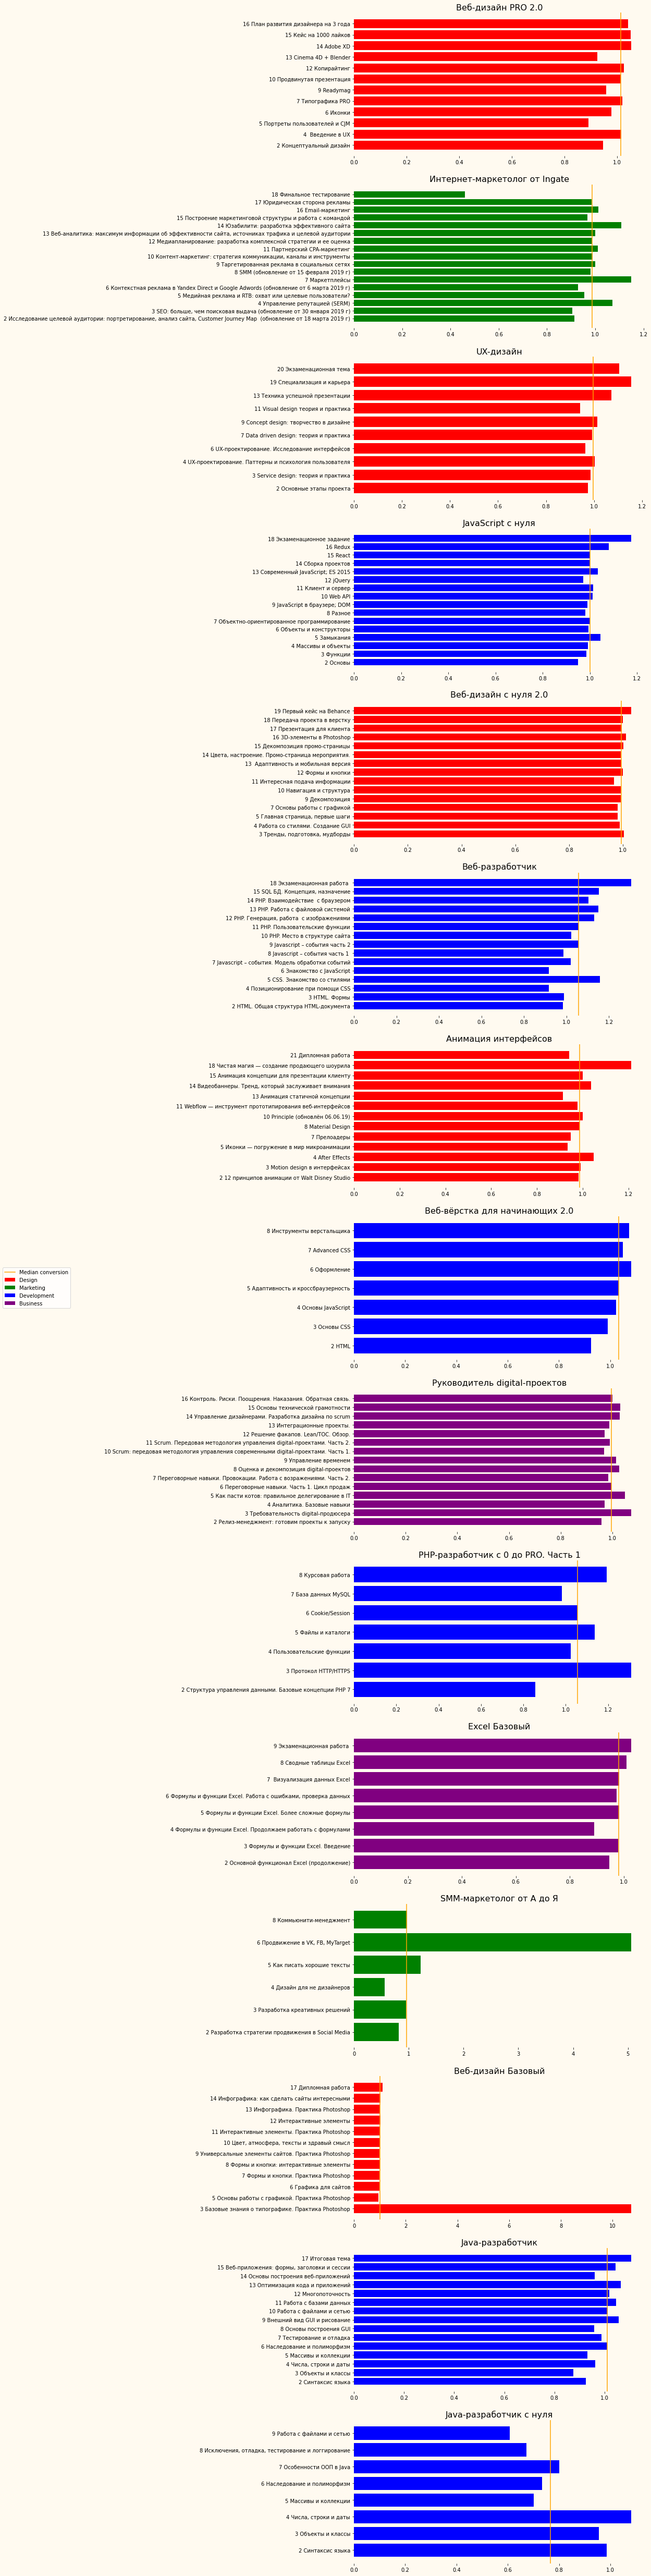

In [ ]:
# создаем набор графиков, состоящий из й столбцм и 15 строк
fig, axes = plt.subplots(15, 1, figsize=(10, 90))
row, column = 0, 0

# создание словаря со значениями цветов для каждого типа курса 
used_labels= []
# создание словаря цветов для каждого типа курсов
color_field = {
    'Design': 'red',
    'Marketing': 'green',
    'Development': 'blue',
    'Business': 'purple' 
}

# изменение фона графика
fig.set_facecolor('floralwhite')
# задаем лейбл для первой медианы
label_median = 'Median conversion'

for course in df['title'].unique():
    # создаем пустой список для номер модулей с их названием в каждом конкретном курсе
    module_list = []
    # создаем игнорируемую переменную, через которую заполняем спиок обозначений модулей
    _ = df_res[df_res['title'] == course].apply(lambda row: module_list.append(f'{ row["module_number"] } { row["module_title"] }'), axis=1)
    # переменная, содержащая тип курса
    field = df[df['title'] == course]['field'].unique()[0]
    
    # если лейбл уже имеется в списке использованных лейблов, то к его названию добавляем _, тем самым давай matplotlib понять, что данный лейбл уже имеется в легенде, а это дубликат
    if field in used_labels:
        # отрисовываем горизонтальные столобцы со значениемя конверсии
        # лейблу присвоить название типа курса
        # задаем цвет столбцов в соответствие со значением цвета типа курса из словаря label_colors
        # устанавливаем значение прозрачности 0.1
        axes[row].barh(module_list, df_res[df_res['title'] == course].conversion, label=f'_{field}', color=color_field[field])
        # задаем линию, показывающее медианное значение количества студентов
        axes[row].axvline(x=df_res[df_res['title'] == course].conversion.median(), ls='-', label=label_median, color='orange')  
    else:
        used_labels.append(field)
        
        axes[row].barh(module_list, df_res[df_res['title'] == course].conversion, label=field, color=color_field[field])
        axes[row].axvline(x=df_res[df_res['title'] == course].conversion.median(), ls='-', label=label_median, color='orange') 
        
    # устанавливаем название графика и размер шрифта
    axes[row].set_title(course, fontsize=16)
#     # включаем отображение легенды графика
#     axes[row].legend()
    # убираем рамку у графиков
    axes[row].set_frame_on(False)
    # переходим на следующую строчку набора
    row += 1
    
    label_median = '_Median conversion'

fig.legend(loc='center left')
# выводим график на экран
plt.show()

1. В целом картина по конверсии на разных курсах одинакова - с каждым модулем становится все меньше людей. Причин может быть несколько - сложный для усвоения материал или просто неинтересный курс.
2. Имеются 2 курса с аномальной конверсией в одном модуле - SMM-маркетолог и Веб-дизайн
- в SMM-маркетолого большой популярностью пользуется модуль "Продвижение в VK, FB, MyTarget". Как мне кажется, потому что он основной на данном курсе. Остальные модули вспомогательные
- в Веб-дизайне "главный" по показателю конверсии - модуль по типографике. Придумать красивый, броский шрифт для сайта видимо основная задача

## 5. Метрика успеваемости 

In [ ]:
# создаем датафрейм с данными по студентам, которые выполнили домашнюю работу
# используем только необходимые для исследования колонки
df = data[(data['is_homework'] == True) & (data['status'] == 'done')][['title', 'student_id', 'lesson_token', 'start_date', 'finish_date']]

In [ ]:
# # приведем дату начала выполнения домашней работы к формату "год-месяц-день" 
df['start_date'] = df['start_date'].apply(lambda date: datetime.strptime(date.split(' ')[0], '%Y-%m-%d'))
# # приведем дату окончания выполнения домашней работы к формату "год-месяц-день" 
df['finish_date'] = df['finish_date'].apply(lambda date: datetime.strptime(date.split(' ')[0], '%Y-%m-%d'))

In [ ]:
# добавляем новую колонку, содержащую количество дней потраченных на выполнение домашней работы
df['time_for_complete'] = df.apply(lambda row: (row['finish_date'] - row['start_date']).days, axis=1)

In [ ]:
# группируем значения по названию курса и получаем стартовое значение последних 10% результатов выполнения домашней работы
# будем считать составлять список студентов, входящих в это время выполнение, т.к. за таким долгим временем выполнения домашних работ кроятся определенные проблемы
df_bad_time = df.groupby('title')['time_for_complete'].quantile(0.9)

In [ ]:
# создаем датафрейм, в который будем помещать итоговые значения
df_res = pd.DataFrame(columns=['title', 'student_id', 'lesson_token', 'start_date', 'finish_date'])

In [ ]:
# проходим по всем курсам и выбираем студентов, время выполнения домашних работ которых больше или равно стартового значения 0.9 квантиля
for course in df_bad_time.index:
    bad_df = df[(df['title'] == course) & (df['time_for_complete'] >= df_bad_time.loc[course])]
    df_res = df_res.append(bad_df, ignore_index=True)

In [ ]:
df_res

,title,student_id,lesson_token,start_date,finish_date,time_for_complete
0,Excel Базовый,35a96a3a2e6a0e4eef24fbd6786580c7,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,2018-08-23,2018-09-06,14.0
1,Excel Базовый,1d12f0d468e75ef82b5ec318149619e3,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,2019-04-25,2019-05-11,16.0
2,Excel Базовый,29ef8d917b96aa4e661a803bf27d41c6,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,2019-01-06,2019-01-26,20.0
3,Excel Базовый,23c2a785bcdf33eef4879128f12547f5,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,2019-05-15,2019-06-20,36.0
4,Excel Базовый,bad44963c1bcb55778312a277a07cdf8,3f8ddbc4-7252-4ed8-92eb-337030ea8f45,2019-04-09,2019-07-16,98.0
...,...,...,...,...,...,...
4584,Руководитель digital-проектов,61879804e9a0a2f0fb16ac0ba0261c98,057e5133-4d4f-4a7a-ba15-e4f19cc5bca4,2019-04-06,2019-05-20,44.0
4585,Руководитель digital-проектов,3116713ba1faa82bbede521fd0d16b5b,057e5133-4d4f-4a7a-ba15-e4f19cc5bca4,2018-02-27,2018-06-29,122.0
4586,Руководитель digital-проектов,58b9317f86e512d0056621dd777a8dee,057e5133-4d4f-4a7a-ba15-e4f19cc5bca4,2018-08-06,2018-09-19,44.0
4587,Руководитель digital-проектов,010d6e8dc468762861b73274f3c4baf8,057e5133-4d4f-4a7a-ba15-e4f19cc5bca4,2018-11-27,2019-01-16,50.0


1. Мне кажется, что начинать исследование проблем у студентов надо со времени выполнения домашних работ. Конечно причина может быть и в неимении возможности сесть за выполнение домашней работы. Но это малый процент от всего результата. Большая же часть студентов имеет такое время выполнения из-за проблем связанных с подготовкой к этим работам.
2. В данной выборке также должны учитываться работы, которые начали делать, но еще не закончили. Но у меня нет информации, о конкретной дате, когда были выгружены данные. Поэтому я не могу правильную конечную дату, для расчета времени выполнения и, следовательно, объективно судить о времени выполнения несданных работ